# Happy Customer Project

### Background

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. From operational standpoint we have been facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

### Data Description

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
X1 = my order was delivered on time
X2 = contents of my order was as I expected
X3 = I ordered everything I wanted to order
X4 = I paid a good price for my order
X5 = I am satisfied with my courier
X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

### Goals: 
- Predict if a customer is happy or not based on the answers they give to questions asked.

### **Phase 1:** Analysis the features

### load dataset

In [189]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
dataset= pd.read_csv(r"ACME-HappinessSurvey2020.csv")

At first, we create a dataset from data with all features available. Then train a RandomForestClassification model on the whole dataset. Then, easily plot the effect of each feature on the accuracy

In [193]:
x= dataset.iloc[:,1:].values
y=dataset.iloc[:,0].values

In [195]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [205]:
x_columns=dataset.iloc[:,1:]

In [197]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [207]:
features_importance=pd.DataFrame({"Feature":x_columns.columns,"Importance":rfc.feature_importances_})

In [213]:
features_importance = features_importance.sort_values(by='Importance', ascending=False)


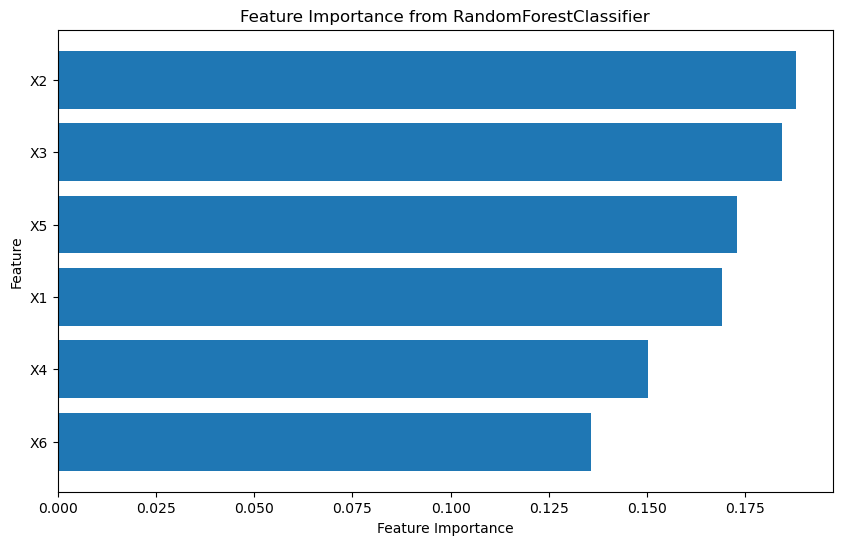

In [215]:
plt.figure(figsize=(10, 6))
plt.barh(features_importance['Feature'], features_importance['Importance'], align='center')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForestClassifier')
plt.show()

Based on the above plot, features "X6" and "X4" have the lowest effect on the accuracy. Then we drop these features 

In [217]:
dataset1=dataset.drop(["X4","X6"],axis=1)
x= dataset1.iloc[:,1:].values
y=dataset1.iloc[:,0].values

In [219]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [221]:
dt_1=DecisionTreeClassifier(random_state=42)
dt_1.fit(x_train,y_train)
y_pred=dt_1.predict(x_test)
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.7307692307692307
